In [ ]:
!pip install -U scikit-fuzzy

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [ ]:
crisis = ctrl.Antecedent(np.arange(0, 101, 1), "crisis")
saba = ctrl.Antecedent(np.arange(0, 101, 1), "saba")
expiratory_output = ctrl.Antecedent(np.arange(0, 101, 1), "expiratory_output")
severity = ctrl.Consequent(np.arange(0, 101, 1), "severity")

In [ ]:
crisis.automf(names=["weekly", "diary", "continuos"])
saba.automf(names=["weekly", "diary", "continuos"])
expiratory_output.automf(names=["50-80", "33-55", "less_33"])
severity.automf(names=["moderate", "high_pitch", "health_risk"])

In [ ]:
crisis["weekly"] = fuzz.trapmf(crisis.universe, [0, 0, 30, 50])
crisis["diary"] = fuzz.trapmf(crisis.universe, [30, 50, 70, 90])
crisis["continuos"] = fuzz.trapmf(crisis.universe, [80, 90, 100, 100])

saba["weekly"] = fuzz.trapmf(saba.universe, [0, 0, 20, 40])
saba["diary"] = fuzz.trapmf(saba.universe, [20, 40, 60, 80])
saba["continuos"] = fuzz.trapmf(saba.universe, [80, 90, 100, 100])

expiratory_output["50-80"] = fuzz.trapmf(expiratory_output.universe, [0, 0, 20, 40])
expiratory_output["33-55"] = fuzz.trapmf(expiratory_output.universe, [20, 40, 60, 80])
expiratory_output["less_33"] = fuzz.trapmf(expiratory_output.universe, [80, 90, 100, 100])

severity["moderate"] = fuzz.trimf(severity.universe, [0, 30, 60])
severity["high_pitch"] = fuzz.trimf(severity.universe, [30, 60, 85])
severity["health_risk"] = fuzz.trimf(severity.universe, [90, 100, 100])

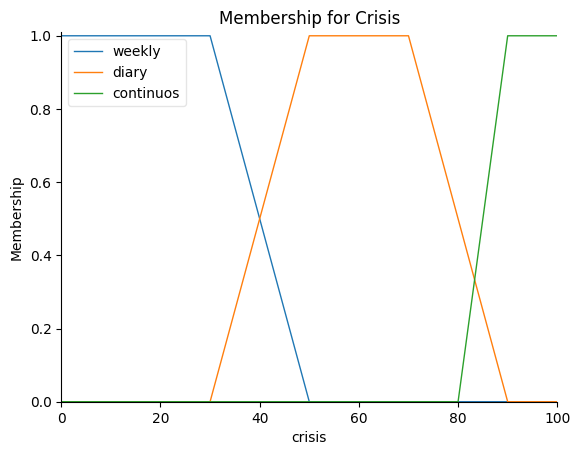

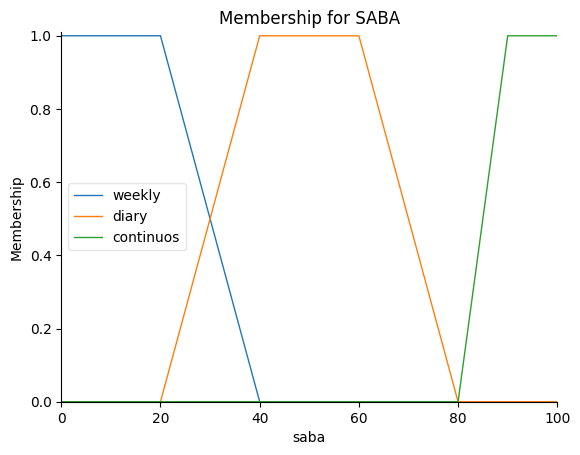

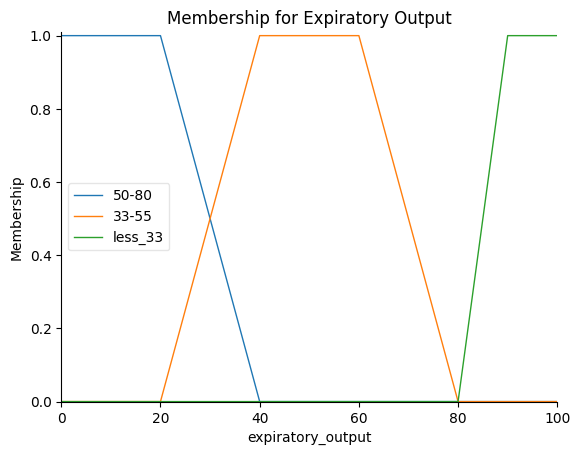

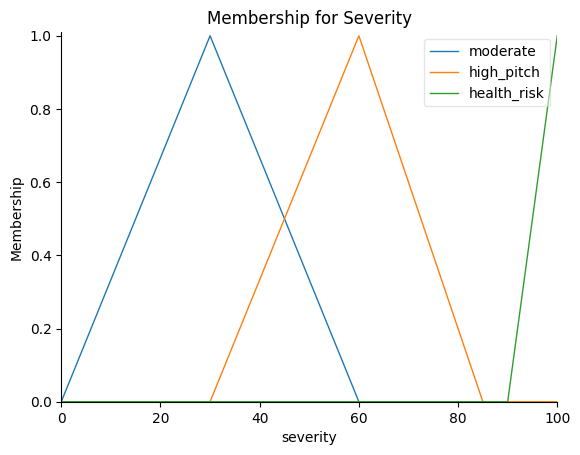

In [ ]:
crisis.view()
plt.title("Membership for Crisis")
plt.show()

saba.view()
plt.title("Membership for SABA")
plt.show()

expiratory_output.view()
plt.title("Membership for Expiratory Output")
plt.show()

severity.view()
plt.title("Membership for Severity")
plt.show()

In [ ]:
rule1 = ctrl.Rule(crisis["weekly"] | saba["weekly"] | expiratory_output["50-80"], severity["moderate"])
rule2 = ctrl.Rule(crisis["diary"] | saba["diary"] | expiratory_output["33-55"], severity["high_pitch"])
rule3 = ctrl.Rule(crisis["continuos"] | saba["continuos"] | expiratory_output["less_33"], severity["health_risk"])

In [ ]:
asthma_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
asthma = ctrl.ControlSystemSimulation(asthma_ctrl)

In [ ]:
asthma.input["crisis"] = 950
asthma.input["saba"] = 95
asthma.input["expiratory_output"] = 100

asthma.compute()

result = asthma.output["severity"]

if 0 <= result < 60:
  print(f"Moderate - Severity {result}")
elif 60 <= result < 90:
  print(f"High pitch - Severity {result}")
else:
  print(f"Health risk - Severity {result}")

Health risk - Severity 96.66666666666663
